In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (10,6)

# Problem 1

## A)

In [2]:
# Normal distribution with a mean of 0 and a sigma of 3
background = stats.norm.rvs(0, 3, size = 1000000)
# Random uniform signal distribution
signal = np.random.uniform(0, 20, size=1000000)

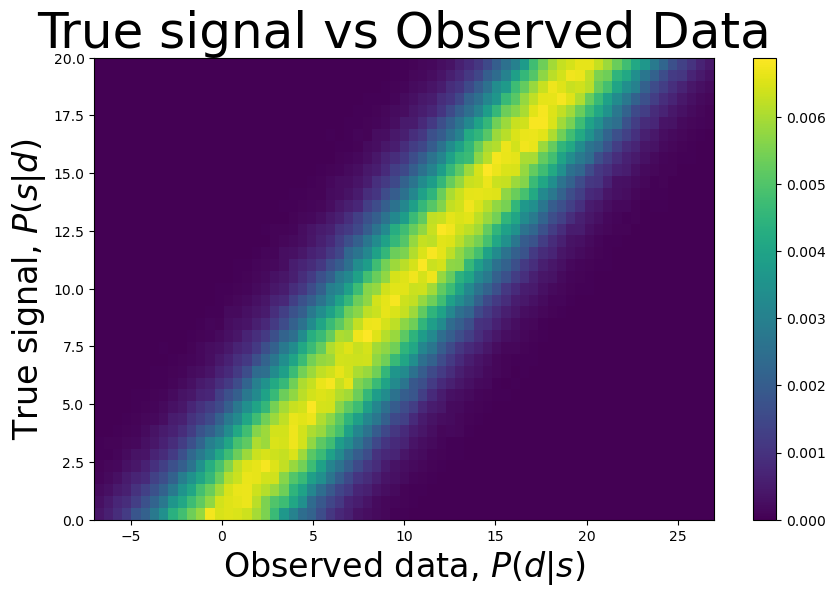

In [3]:
# Combining data
data = background + signal

signal_edges = np.linspace(0,20,40)
data_edges = np.linspace(-7,27,68)

# Setting up plot
Psd, temp, temp2= np.histogram2d(data,signal, bins=[data_edges,signal_edges], density=True)

# Setting up colors
datacenters = (data_edges[:-1] + data_edges[1:]) / 2
signalcenters = (signal_edges[:-1] + signal_edges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T, shading = 'auto')

# Labels, legend, and axes
plt.title("True signal vs Observed Data", fontsize = 36)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.colorbar()

plt.show()

The above histogram shows the distribution of a normal distribution with $\sigma=3$, and a mean of 0. Added over top is a uniformly distributed random signal. From this plot, we can see the possible true signals for a given observational value and vice versa. This shows that knowing one doesn't necessarily mean we know both. For example, if we have an observational value from an experiment, then we can use this to create the corrosponding probability distribution for the possible values of the true signal. We see thi displayed as a range of values instead of a constant since the background is not just a constant, but rather a range itelf.

## B)

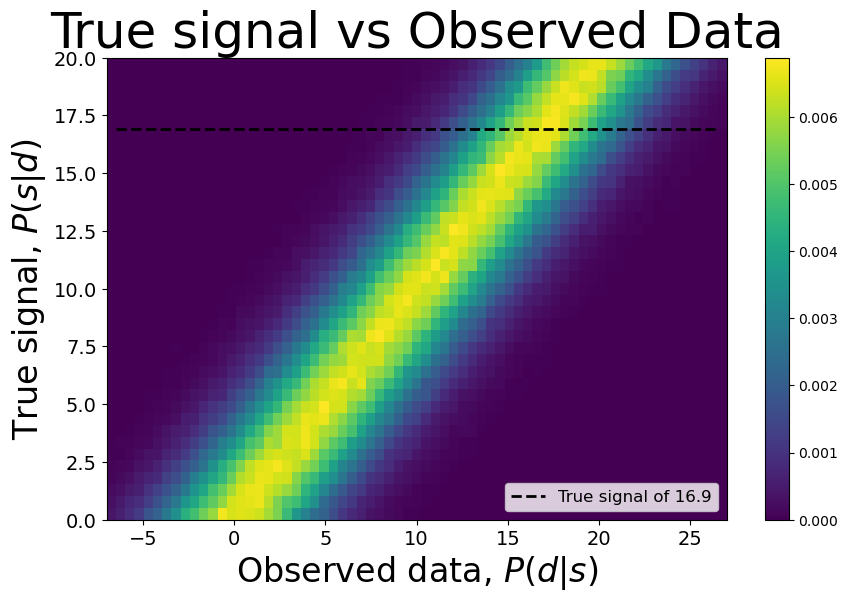

In [4]:
# Using a true signal of 16.9
true_signal = [16.9]*(len(data_edges)-2)

# Plotting dashed line
fig, ax = plt.subplots()
plt.tick_params(labelsize = 14)
plt.pcolormesh(datacenters,signalcenters,Psd.T, shading = 'auto')
plt.plot(data_edges[1:-1], true_signal ,linestyle='--',linewidth= 2 ,color='black',label='True signal of 16.9')

# Labels, legend, and axes
plt.title("True signal vs Observed Data", fontsize = 36)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax.legend(loc='lower right', fontsize=12)
plt.colorbar()

plt.show()

In [5]:
observed_values = []
for i in range(len(data)):
    if signal[i] >= 16.9 and signal[i] <=16.99:
        observed_values.append(data[i])

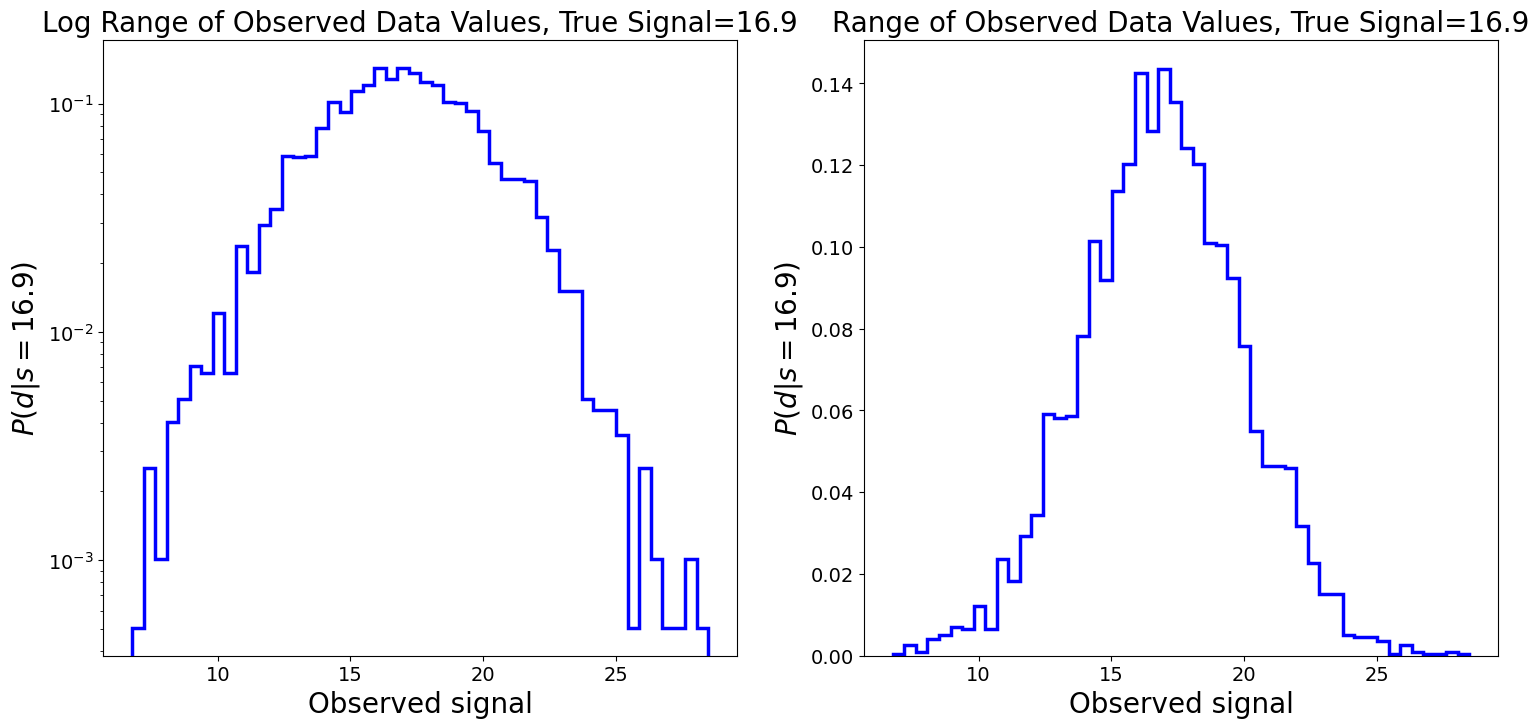

In [6]:
# Range of possible observed data values for the true signal of 16.9
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8))
plt.style.use('ggplot')

# Plots data
ax1.hist(observed_values, histtype='step', color='b', density=True, linewidth=2.5, bins=50)
ax1.set_title("Log Range of Observed Data Values, True Signal=16.9",fontsize=20)
ax1.set_xlabel('Observed signal',fontsize=20)
ax1.set_ylabel('$P(d|s=16.9)$',fontsize=20)
ax1.tick_params(labelsize = 14)
ax1.set_yscale('log')


ax2.hist(observed_values, histtype='step', color='b', density=True, linewidth=2.5, bins=50)
ax2.set_title("Range of Observed Data Values, True Signal=16.9",fontsize=20)
ax2.set_xlabel('Observed signal',fontsize=20)
ax2.set_ylabel('$P(d|s=16.9)$',fontsize=20)
ax2.tick_params(labelsize = 14)

plt.show()

Here we have 2 plots, with the left being a log plot, of the observed signal possible range for a set true signal of 16.9. The plotted values are  directly from the combination of the background distribution and the uniform signal distribution, which in the code is stored as ```data```. This is represented as the data points that lie along the overplotted dashed line in the previous graphs. On the right plot, we are seeing the probabilites of the various signals that were observed along the dashed line. Again, given the nature of a background distribution, this is represented as a range; it can either add or subtract due to the shape of the background, and thus carries some level of uncertainty on what the observed signal might be. On the left plot, we see the same data set, but ith a logarithmic y-axis, which helps us determine if the shape is indeed a Gaussian distribution as we can more closely examine the tails and other small changes along the curve.

The observed signal can have a value less outside the bounds of 0 or 10, even though the signal that was injected was restricted to be between 0 and 20. The reason for this is because the background can add or subtract to the signal, which means we can have signals higher than 20 (as shown above), or lower than 0.

## C)

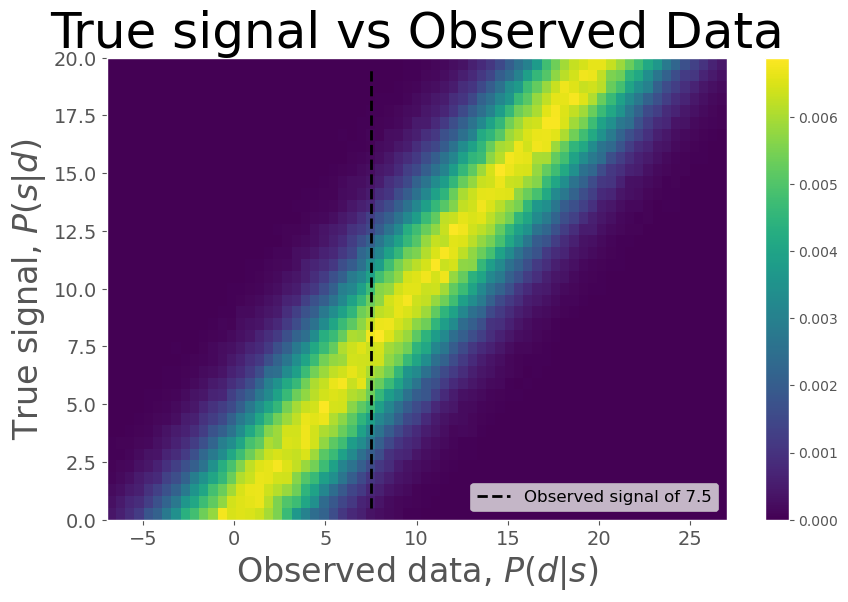

In [7]:
# Using an observed signal of 7.5
observed_signal = [7.5]*(len(signal_edges)-2)

# Plotting dashed line
fig, ax = plt.subplots()
plt.tick_params(labelsize = 14)
plt.pcolormesh(datacenters,signalcenters,Psd.T, shading = 'auto')
plt.plot(observed_signal, signal_edges[1:-1], linestyle='--',linewidth= 2 ,color='black',label='Observed signal of 7.5')

# Labels, legend, and axes
plt.title("True signal vs Observed Data", fontsize = 36)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax.legend(loc='lower right', fontsize=12)
plt.colorbar()

plt.show()

Using the exact same 2D histogram for the distributions of the signal and the signal and background combination, we can now look at the opposite case, where we have an observed data value but now we want to find the range of possible true signal values. We draw a verical line across the observed data value of 7.5.

In [8]:
true_signals = []
for i in range(len(data)): 
    if data[i] >= 7.5 and data[i] <=7.59:
        true_signals.append(signal[i])

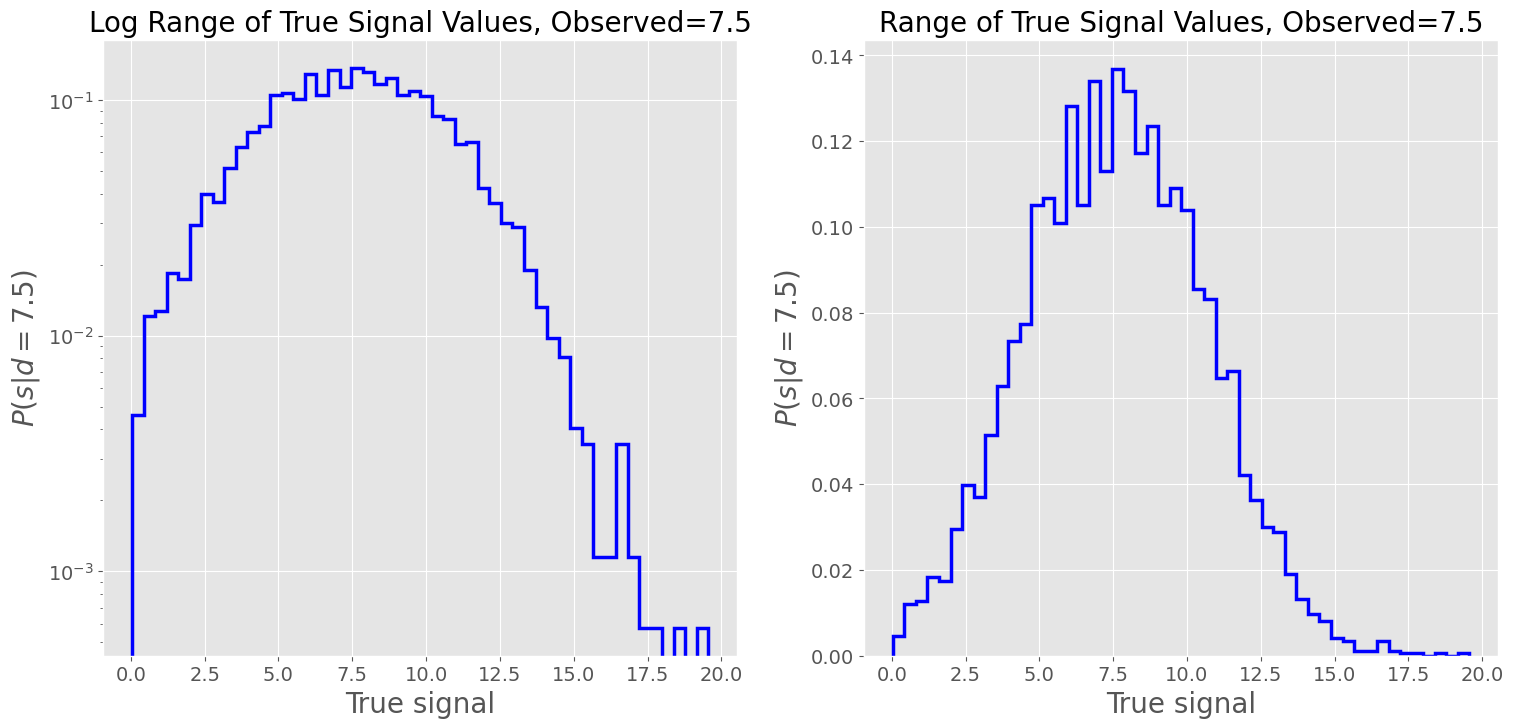

In [9]:
# Range of possible true signals values for the true signal of 16.9
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8))
plt.style.use('ggplot')

# Plots data
ax1.hist(true_signals, histtype='step', color='b', density=True, linewidth=2.5, bins=50)
ax1.set_title("Log Range of True Signal Values, Observed=7.5",fontsize=20)
ax1.set_xlabel('True signal',fontsize=20)
ax1.set_ylabel('$P(s|d=7.5)$',fontsize=20)
ax1.tick_params(labelsize = 14)
ax1.set_yscale('log')


ax2.hist(true_signals, histtype='step', color='b', density=True, linewidth=2.5, bins=50)
ax2.set_title("Range of True Signal Values, Observed=7.5",fontsize=20)
ax2.set_xlabel('True signal',fontsize=20)
ax2.set_ylabel('$P(s|d=7.5)$',fontsize=20)
ax2.tick_params(labelsize = 14)

plt.show()

Using the same steps as before, we can make plots for both probability and log probability for the possible true signal values. This time, the plot represents data along the drawn vertical black line. The log plot is again use to examine if the shape of the data is Gaussian as well as inspect small changes along the tails. It is important to note that the true signal can never be outside the range of 0 to 20, which explains why the graphs start at 0 an go to 20.

# Problem 2

In [10]:
# Shift a Gaussian along the x axis
shifted_background = stats.norm.rvs(loc=7,scale=3.5,size=1000000)  # sigma=4
shifted_signal = np.random.uniform(low=0,high=20,size=1000000)
shifted_data = shifted_background + shifted_signal

In [11]:
shifted_signal_edges = np.linspace(0,20,40)
shifted_data_edges = np.linspace(0,34,68)

Psd, temp, temp2= np.histogram2d(shifted_data,shifted_signal, bins=[shifted_data_edges,shifted_signal_edges], density=True)
shifted_datacenters = (shifted_data_edges[:-1] + shifted_data_edges[1:]) / 2
shifted_signalcenters = (shifted_signal_edges[:-1] +shifted_signal_edges[1:]) / 2

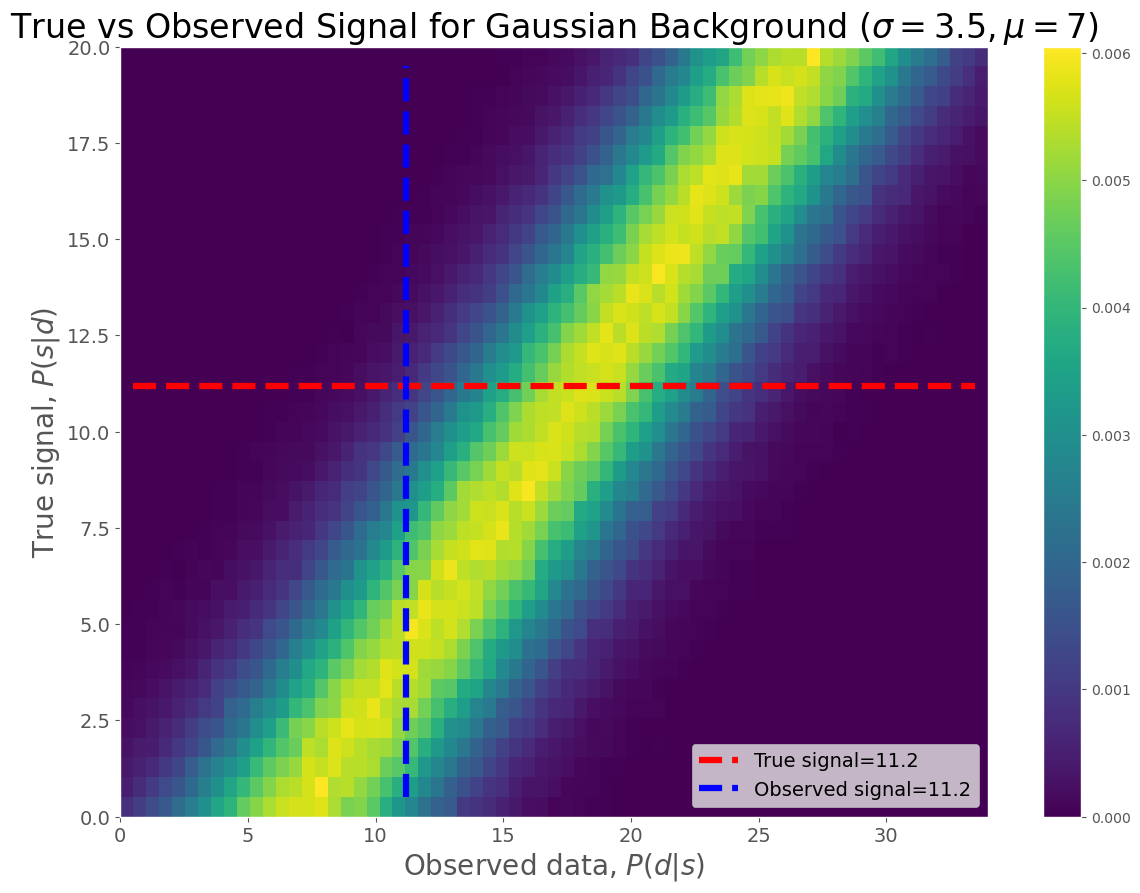

In [12]:
# Same plot, with same value for true and observed for comparison
d = [11.2]*(len(shifted_data_edges)-2) 
t = [11.2]*(len(shifted_signal_edges)-2)

fig, ax = plt.subplots(1,1, figsize=(14,10))

# Labels and axes
ax.set_title("True vs Observed Signal for Gaussian Background ($\sigma=3.5, \mu=7$)",fontsize=24)
ax.set_xlabel('Observed data, $P(d|s)$',fontsize=20)
ax.set_ylabel('True signal, $P(s|d)$',fontsize=20)
plt.tick_params(labelsize = 14)
plt.pcolormesh(shifted_datacenters,shifted_signalcenters,Psd.T,shading='auto')

# Plotting the dashed lines and legend
plt.plot(shifted_data_edges[1:-1],d,linestyle='--',linewidth=4.5,color='r',label='True signal=11.2')
plt.plot(t,shifted_signal_edges[1:-1],linestyle='--',linewidth=4.5,color='b',label='Observed signal=11.2')
ax.legend(loc='lower right', fontsize=14)

plt.colorbar()
plt.show()

Here we have another 2D histogram of a signal combined with a Gaussian background. However, now the mean of the Gaussian has shifted along the x axis. The mean of 7 and sigma value to be 3.5 were chosen arbitrarily. The background here remains a Gaussian PDF and the injected signal is still the same with a range of (0,20). Both the true and observed signal=11.2 lines are plotted on this histogram. These lines will be used later to slice the data to look at the range plots again.

In [16]:
shifted_observed_values = []
for i in range(len(shifted_data)):
    if shifted_signal[i] >= 11.2 and shifted_signal[i] <=11.29:
        shifted_observed_values.append(shifted_data[i])

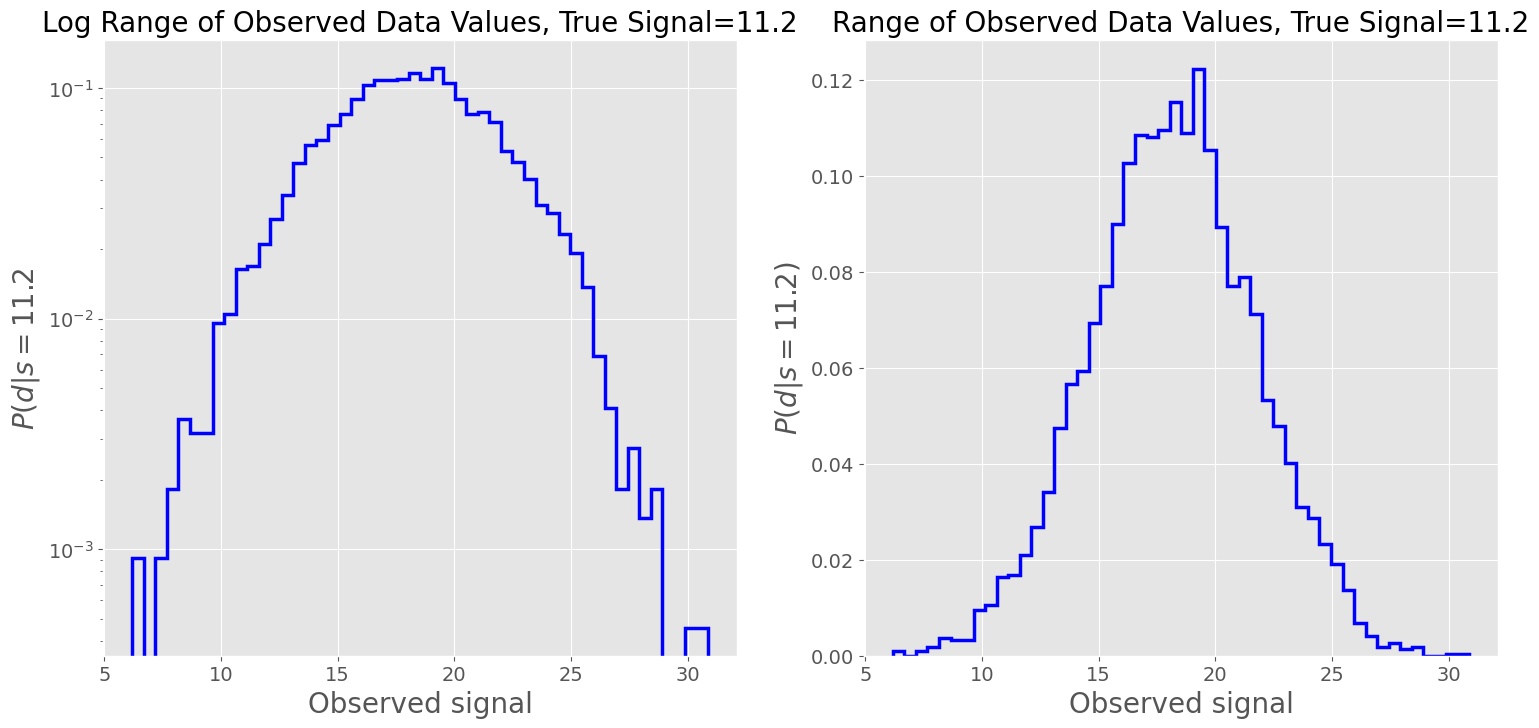

In [17]:
# Range of possible observed data values for the true signal of 11.2
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8))
plt.style.use('ggplot')

# Plots data
ax1.hist(shifted_observed_values, histtype='step', color='b', density=True, linewidth=2.5, bins=50)
ax1.set_title("Log Range of Observed Data Values, True Signal=11.2",fontsize=20)
ax1.set_xlabel('Observed signal',fontsize=20)
ax1.set_ylabel('$P(d|s=11.2`)$',fontsize=20)
ax1.tick_params(labelsize = 14)
ax1.set_yscale('log')


ax2.hist(shifted_observed_values, histtype='step', color='b', density=True, linewidth=2.5, bins=50)
ax2.set_title("Range of Observed Data Values, True Signal=11.2",fontsize=20)
ax2.set_xlabel('Observed signal',fontsize=20)
ax2.set_ylabel('$P(d|s=11.2)$',fontsize=20)
ax2.tick_params(labelsize = 14)

plt.show()

As with before, we plot the range of observed values for a true signal of 11.2, and the corresponding log plot. The log plot shows distribution that closely resembles a Gaussian with some small sections at the tails where the fidelity is lost. The observed signal mean for a true signal=11.2 will not be 11.2. This is because we are looking at the background plus signal combined, and since the background has a mean of 7, we would add 7 to our mean of 11.2, hence why we have a mean of roughly 18.2 instead of 11.2. If it were 0-mean, the mean would be the same as the true signal mean. The observed values are shifted because of the shift in the background, but the true signal values were not.

In [19]:
shifted_true_signals = []
for i in range(len(data)): 
    if shifted_data[i] >= 11.2 and shifted_data[i] <=11.29:
        shifted_true_signals.append(shifted_signal[i])

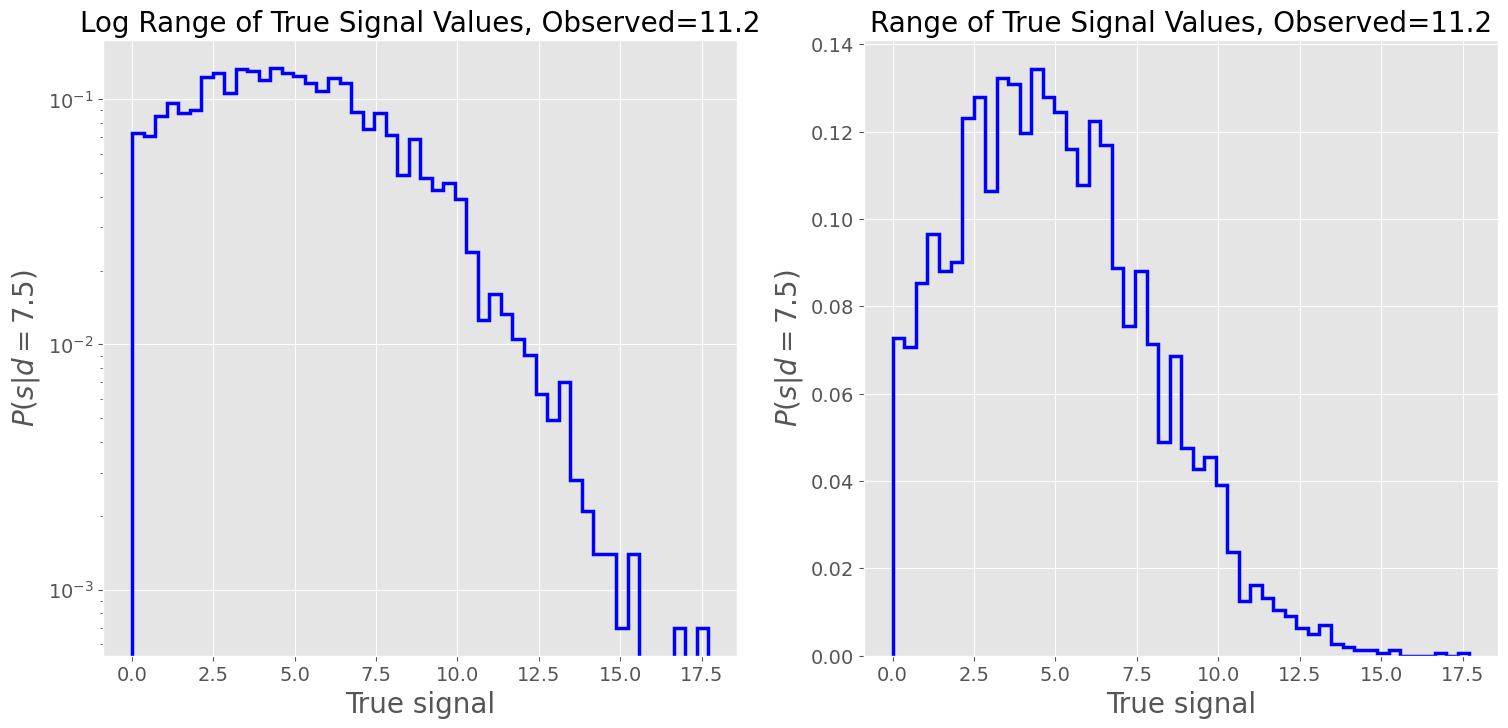

In [21]:
# Range of possible true signals values for the true signal of 16.9
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8))
plt.style.use('ggplot')

# Plots data
ax1.hist(shifted_true_signals, histtype='step', color='b', density=True, linewidth=2.5, bins=50)
ax1.set_title("Log Range of True Signal Values, Observed=11.2",fontsize=20)
ax1.set_xlabel('True signal',fontsize=20)
ax1.set_ylabel('$P(s|d=11.2)$',fontsize=20)
ax1.tick_params(labelsize = 14)
ax1.set_yscale('log')


ax2.hist(shifted_true_signals, histtype='step', color='b', density=True, linewidth=2.5, bins=50)
ax2.set_title("Range of True Signal Values, Observed=11.2",fontsize=20)
ax2.set_xlabel('True signal',fontsize=20)
ax2.set_ylabel('$P(s|d=11.2)$',fontsize=20)
ax2.tick_params(labelsize = 14)

plt.show()

Similar to before, we plot the range true signal if the observed signal is 11.2. This time, we see the abrupt cutoff at signal=0, since we did not inject any signal below 0, or any above 20, meaning that it is not possible to get a value below 0 or above 20.

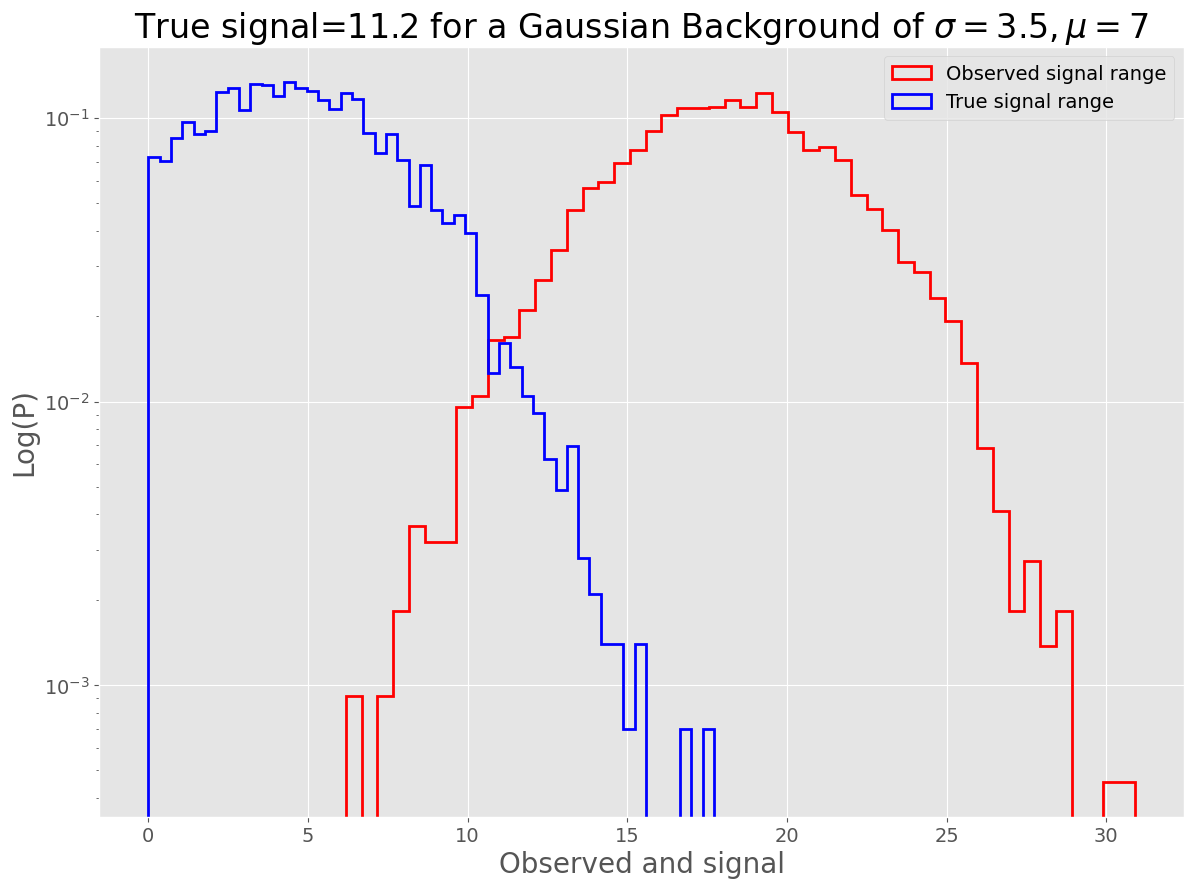

In [27]:
fig, ax = plt.subplots(1,1, figsize=(14,10))
ax.set_title("True signal=11.2 for a Gaussian Background of $\sigma=3.5, \mu=7$",fontsize=24)
ax.set_xlabel('Observed and signal',fontsize=20)
ax.set_ylabel('Log(P)',fontsize=20)
plt.tick_params(labelsize = 14)

ax.hist(shifted_observed_values,histtype='step',color='r',density=True,linewidth=2,bins=50,label='Observed signal range')
ax.hist(shifted_true_signals,histtype='step',color='b',density=True,linewidth=2,bins=50,label='True signal range')
ax.set_yscale('log')

ax.legend(loc='best',fontsize=14)
plt.show()

Finally, when we compare between the true signal range and the observed signal range, we see these two no longer share the same mean value. The red curve, the possible observed values when we have a signal is truly 11.2, still shows a nice Gaussian like the one we saw earlier. However, this one is  shifted farther along the x-axis. This is due to the combination of the background, which was shifted with the signal, which was not shifted. since the background has a mean of 7 while the signal did not have an additive change or shift along x, we see the observe signal range shift by roughly 7 in the x direction. Therefore, these two probability distributions will no longer share the same center value if the background has an additive or subtractive mean to it, because the raw signal alone does not experience this change.